# Perfect sheet for reference

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

sns.set()


In [2]:
data= pd.read_csv('C:\\Users\\W10\\Desktop\\Gamaka Notes\\Ecommerce Customers.csv')

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data = data.drop(['Email','Address','Avatar'],axis=1)  
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


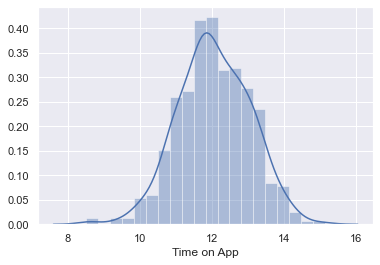

In [5]:
sns.distplot(data['Time on App'])

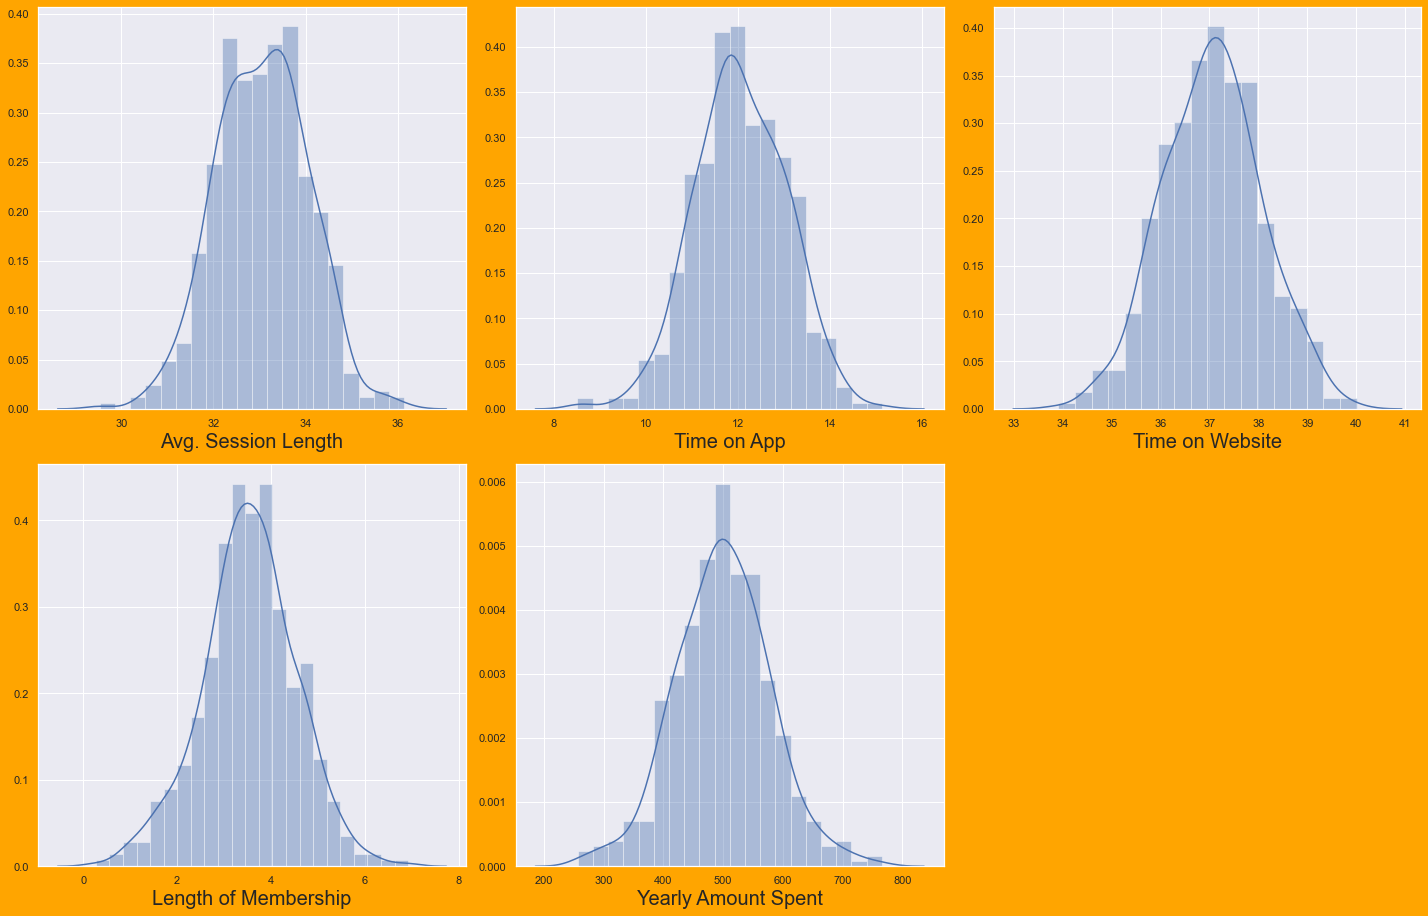

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='Orange')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

In [7]:
y= data['Yearly Amount Spent']  #predict or dependent variable

In [8]:
x=data.drop(['Yearly Amount Spent'],axis=1)

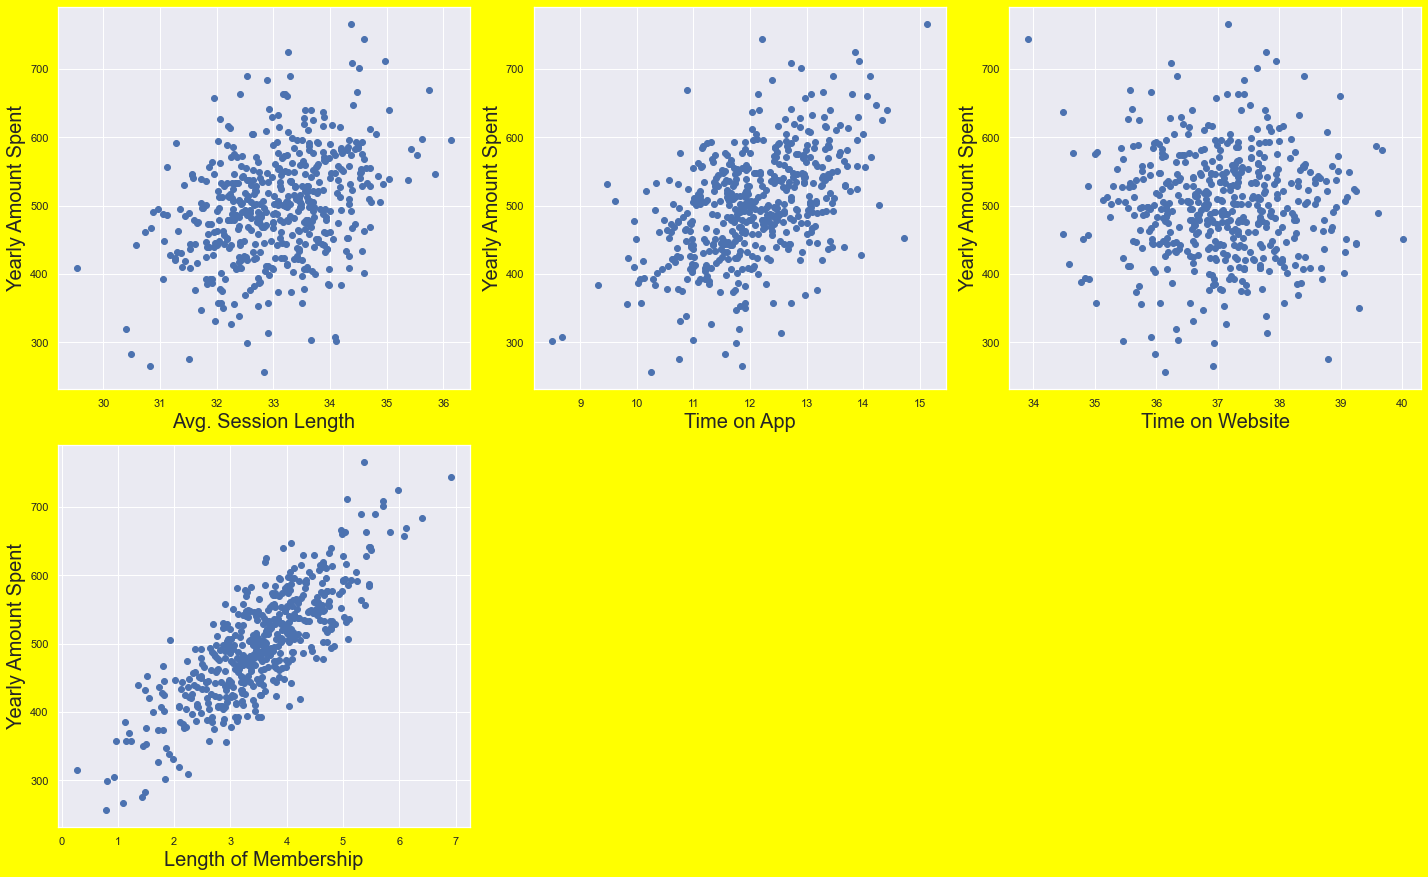

In [9]:
plt.figure(figsize=(20,30), facecolor='Yellow')
plotnumber = 1

for column in x:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Yearly Amount Spent',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_train,y_train)

LinearRegression()

In [14]:
predy = reg.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [16]:
rmse=sqrt(mean_squared_error(y_test,predy)) #actual - predict 
rmse

10.363111516235595

In [17]:
import pickle
#save file
filename = 'Ecommerce Customer.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [18]:
reg.score(x,y)

-377.40761003671815